# Construction of Building Typologies from a Regional Material Catalog:
## Assessment of Urban Heat Demand and the Environmental Impact of Retrofit policies.

# (c) Constructing Typologies

**Supplementary material to the paper with the same name**

[M. Esteban Munoz H.](emunozh@gmail.com)

Thu Mar 12, 2015

#Table of Contents
* [1. Define Functions](#1.-Define-Functions)
* [2. Example - Construction Year 1956](#2.-Example---Construction-Year-1956)
* [3. Recompute U-values with MASEA Materials](#3.-Recompute-U-values-with-MASEA-Materials)
	* [3.1. Wall](#3.1.-Wall)
    * [3.2. Roof](#3.2.-Roof)
    * [3.2. Function](#3.2.-Function)
* [4. U-value difference](#4.-U-value-difference)

Import internal libraries

In [3]:
from scripts.components import get_components

# 1. Defined Function `get_components`

The `get_components` function will load materiasl from the hdf data frame, see [(a) Data_Retrival](http://localhost:8888/notebooks/(a). For the computation of u-values we use the R-library *heat* <a name="ref-1"/>[(Munoz H., 2015)](#cite-Munoz.2015). We import the *rpy2* python library to call R functions. The components use the Get MASEA based u-value though the use of the internal function `getMasea`, see [(b) Enriching the Data](http://localhost:8888/notebooks/(b).

Definition of possible construction periods as define in the regional material catalogue.

* The internal function `get_element`, used by function `get_components` retrieves a building component from the catalogue based on:
    1. location
    2. construction year
    3. building component type

* The parameter *location* is define as a string containing the location code from the regional material catalogue. The parameter *year* is define as an integer between defining the construction year of the building. The *building component type* parameter distinguish between two building components: (a) *wall* and (b) *roof*. the regional material catalogue identifies more component types, these other component types haven't been implemented yet into the source code.

* Function `get_year_index` gets the index of list *years* based on an input year of data type integer.

* Function `get_components` calls the other functions and outputs a python dictionary containing the corresponding building components (in this case *wall* and *roof*). Each building component has a list with all the corresponding material layers of each building component and the original u-value from the catalogue. The function takes the construction year as input.

#2. Example - Construction Year 1956

In [12]:
components = get_components(1956)

In [13]:
components

catalogue     masea
year          typ                      
1949 bis 1957 wall       1.63  1.716704
              roof       1.19  1.243339

In [14]:
components = get_components(1956, iteration=10)

In [15]:
components

catalogue     masea
year          typ                      
1949 bis 1957 wall       1.66  1.657532
              roof       1.19  1.243339

# 4. U-value difference

In [4]:
dat = get_components(1918, iteration=1)
for year in range(1910, 1979, 2):
    tmp = get_components(year, iteration=1)
    dat = dat.append([tmp])

In [5]:
dat["diff"] = abs(dat.masea - dat.catalogue) / dat.catalogue

In [6]:
dat = dat.reset_index()

In [7]:
dat.to_csv("difference_uval_1iter.csv")

## Plot

In [8]:
from pylab import polyfit, poly1d

In [9]:
import matplotlib.pylab as plt
import matplotlib
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

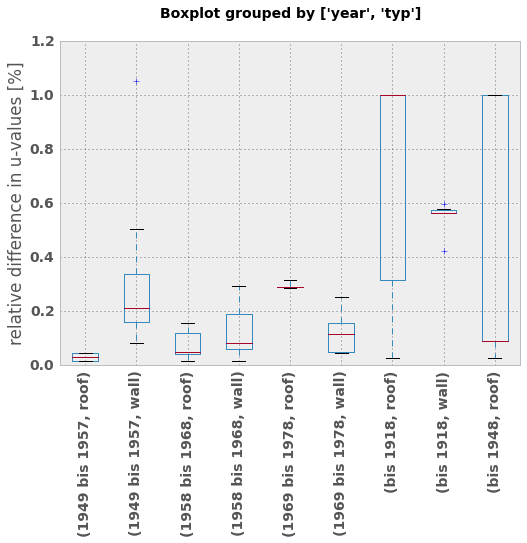

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
bp = dat.boxplot(column='diff', by=['year', 'typ'], ax=ax)
locs, labels = plt.xticks()
labels = bp.get_xticklabels()
labels_ticks = [l.get_text().split("\\\\\\")[0] for l in labels]
ax.set_xticklabels(labels_ticks, rotation=90);
ax.set_title("")
ax.set_ylabel("relative difference in u-values [%]")
ax.set_xlabel("")
#fig.savefig("FIGURES/uval-diff-1iter.png", bbox_inches="tight")

In [13]:
dat.sort("diff").head()

,year,typ,catalogue,masea,diff
43,1949 bis 1957,roof,1.19,1.207057,0.014333
45,1949 bis 1957,roof,1.19,1.207057,0.014333
52,1958 bis 1968,wall,1.08,1.063613,0.015174
57,1958 bis 1968,roof,0.60,0.609133,0.015221
1,bis 1918,roof,2.96,2.890571,0.023456


#References

<a name="cite-Munoz.2015"/><sup>[^](#ref-1) </sup>Munoz H., M. E. (2015), ‘heat: R package to estimate heat demand of residential buildings’.
URL: https://github.com/emunozh/heat
